In [37]:
import pandas as pd
import numpy
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('dataset/yelp_labelled.txt', header=None, delimiter='\t')
df.columns = ['review', 'sentiment']
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [39]:
def clean_text(df):
    all_reviews = list()
    lines = df['review'].values.tolist()
    for text in lines:
        
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        
        tokens = word_tokenize(text)
        
        table = str.maketrans('', '', '\t')
        stripped = [w.translate(table) for w in tokens]
        word = [word for word in stripped if word.isalpha()]
        
        stop_words = set(stopwords.words('english'))
        words = [w for w in word if not w in stop_words]
        
        ps = PorterStemmer()
        words = [ps.stem(w) for w in words]
        all_reviews.append(" ".join(words))
    return all_reviews


all_reviews = clean_text(df)
all_reviews[:20]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chickenwith cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like']

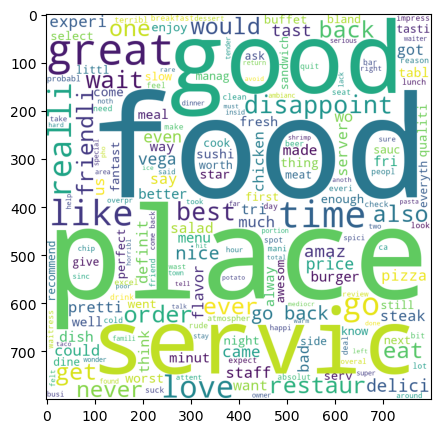

In [40]:
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(all_reviews))

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)


In [41]:
cv = CountVectorizer(min_df=3)

X = cv.fit_transform(all_reviews).toarray()
y = df['sentiment']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1000, 465)
Shape of y: (1000,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
accuray = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)

print(f"Accuracy: {accuray}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.72
Precision: 0.68
Recall: 0.9
F1 Score: 0.77


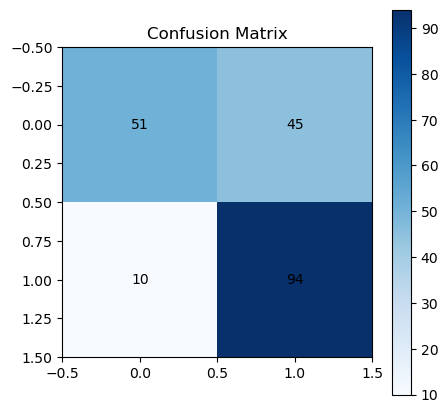

In [44]:
conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
plt.imshow(conf, cmap='Blues')
plt.title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf[i, j], ha='center', va='center', color='black')
plt.colorbar()
plt.show()